<a href="https://colab.research.google.com/github/MohammedSaudh/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
# Importing libraries for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Setting our working directory
working_dir = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Play Store App Review Analysis  Capstone Project 1- Mohammed Saudh/Data/'

In [6]:
#Reading CSV Files
play_store_data = pd.read_csv(working_dir + 'Play Store Data.csv')

In [7]:
#Viewing top 5 rows of data to understand what exactly are we dealing with
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
#Checking No.Of rows and columns in Play Store Data set
play_store_data.shape

(10841, 13)

In [9]:
#Checking All column names of the play store data set
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
#Checking for null values
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
#Checking mean rating of apps by category
mean_rating_by_category = play_store_data.groupby('Category')['Rating'].mean()

In [12]:
mean_rating_by_category

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [13]:
# here we see that in categories there is a value '1.9' with rating 19. this seems to be an error. We will further investigate this.
play_store_data[play_store_data['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
#We can see that there has been a mistake in the data entry for this row as all values have been shifted by 1 column. Correcting this woould be a tedious task hence we will drop this column. 
play_store_data.drop(play_store_data.index[10472],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


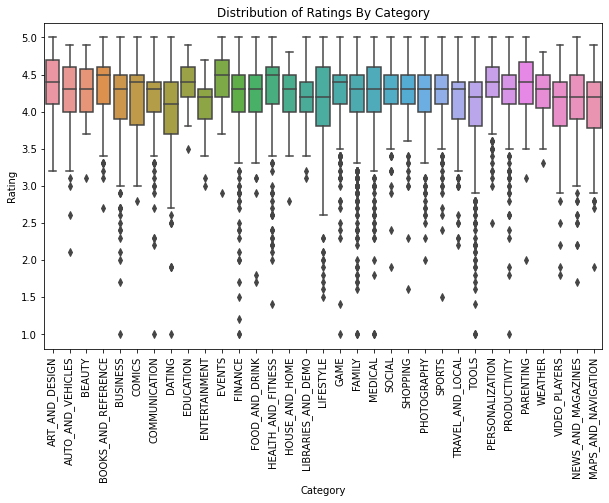

In [15]:
#After dropping the erroneous value we will now plot the distribution of ratings for the categories.
plt.figure(figsize = (10, 6))
sns.boxplot('Category', 'Rating', data=play_store_data)
plt.ylabel('Rating')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.title('Distribution of Ratings By Category');

It can be seen from the above graph that the ratings for most apps lie between 3.8 and 4.8

In [16]:
#We will write a function 'printinfo' to display some attributes like Data Type, No.Of null values and No.Of Unique values of each column 
def printinfo():
  temp = pd.DataFrame(index=play_store_data.columns)
  temp['Data Type'] = play_store_data.dtypes
  temp['null_count'] = play_store_data.isnull().sum()
  temp['Unique Count'] = play_store_data.nunique()
  return temp

In [17]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,1,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [18]:
# From the above details we can see that there is 1 null value in the column 'Type', we will investigate this.
play_store_data[play_store_data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [19]:
#By checking on play store, it is found that it is a Free app. Hence we will fill this value. 
play_store_data['Type'].fillna("Free", inplace=True)

In [20]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [21]:
#There arent many assumptions or deductions we can make from Details like Current version, Last updated and Android Version. Hence we will drop these columns.
play_store_data.drop(['Current Ver', 'Last Updated', 'Android Ver'], axis=1, inplace=True)

In [22]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [23]:
# We will check for the null values in the 'Rating' Column.
play_store_data[play_store_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business


In [24]:
#Since there are a lot of repetitive values in Rating columns and there isnt much deviation in the values 'Mode' would be a better indicator to replace the null values with. Hence we find the mode for the 'Rating' Column.
Rating_mode = play_store_data['Rating'].mode()

In [25]:
Rating_mode[0]

4.4

In [26]:
#Replacing the Null values in the Rating column with the Mode. 
play_store_data['Rating'].fillna(value = Rating_mode[0], inplace=True)

In [27]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Now that the Null Values are dealt with. We can shift our focus to columns where we are expecting Numerical values, but the values are in the form of 'Object' Type

In [28]:
#Converting thhe 'Reviews' Column type from 'object' to 'int'
play_store_data['Reviews'] = play_store_data.Reviews.astype(int)

In [29]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [30]:
#Checking the values Present in the 'Size' Column
list(play_store_data['Size'].unique())

['19M',
 '14M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '2.7M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '4.2M',
 '7.0M',
 '23M',
 '6.0M',
 '6.1M',
 '4.6M',
 '9.2M',
 '5.2M',
 '11M',
 '24M',
 'Varies with device',
 '9.4M',
 '15M',
 '10M',
 '1.2M',
 '26M',
 '8.0M',
 '7.9M',
 '56M',
 '57M',
 '35M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '8.6M',
 '2.4M',
 '27M',
 '2.5M',
 '16M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '5.4M',
 '18M',
 '1.1M',
 '2.2M',
 '4.5M',
 '9.8M',
 '52M',
 '9.0M',
 '6.7M',
 '30M',
 '2.6M',
 '7.1M',
 '3.7M',
 '22M',
 '7.4M',
 '6.4M',
 '3.2M',
 '8.2M',
 '9.9M',
 '4.9M',
 '9.5M',
 '5.0M',
 '5.9M',
 '13M',
 '73M',
 '6.8M',
 '3.5M',
 '4.0M',
 '2.3M',
 '7.2M',
 '2.1M',
 '42M',
 '7.3M',
 '9.1M',
 '55M',
 '23k',
 '6.5M',
 '1.5M',
 '7.5M',
 '51M',
 '41M',
 '48M',
 '8.5M',
 '46M',
 '8.3M',
 '4.3M',
 '4.7M',
 '3.3M',
 '40M',
 '7.8M',
 '8.8M',
 '6.6M',
 '5.1M',
 '61M',
 '66M',
 '79k',
 '8.4M',
 '118k',
 '44M',
 '695

In the observed Values in the 'Size' Column the letter k represents kilobytes and the letter M represents Megabytes. In order to convert this column to numerical type we will have to replace these letters with their numerical values.

In [31]:
#Removing the '+' sign if present from the values in 'Size' column
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.strip('+'))

In [32]:
#Removing the ',' if present from the values in 'Size' column
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace(',', ''))

In [33]:
#Replacing k with 1000 and M with 1000000
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace('M', 'e+6'))
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace('k', 'e+3'))

In [34]:
#There is also a value 'Varies with Device' in the 'Size' column, we will assing NaN value to it. 
play_store_data['Size'] = play_store_data.Size.replace('Varies with device', np.NaN)

In [35]:
#Converting 'Size' Column to numeric type
play_store_data['Size'] = pd.to_numeric(play_store_data['Size'])

In [36]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [37]:
#There are still some null values present in the 'Size' column, as there is no appropriate statistical indicator with which we could replace these values and individually correcting them would be a tedious task, we will drop these values. 
play_store_data.dropna(subset=['Size'], inplace=True)

In [38]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [39]:
#Exploring the 'Installs' Column
play_store_data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10835            10+
10836         5,000+
10837           100+
10838         1,000+
10840    10,000,000+
Name: Installs, Length: 9145, dtype: object

There are characters like + and , in these values which would create problems while converting this column into a numeric type, hence we would have to remove these characters from the values.

In [40]:
#Removing the '+' sign wherever present from the values in 'Installs' column
play_store_data['Installs'] = play_store_data.Installs.apply(lambda x: x.strip('+'))

In [41]:
#Removing the ',' wherever present from the values in 'Installs' column
play_store_data['Installs'] = play_store_data.Installs.apply(lambda x: x.replace(',',''))

In [42]:
#Converting the installs column into numeric type
play_store_data['Installs'] = pd.to_numeric(play_store_data['Installs'])

In [43]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [44]:
#Exploring the 'Price' Column
play_store_data['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10835    0
10836    0
10837    0
10838    0
10840    0
Name: Price, Length: 9145, dtype: object

The Price column might have $ sign in some values and this would create problems in converting this column into a numeric type. Hence we will get rid of this sign.

In [45]:
#Removing $ sign wherever present from the values in 'Price' column
play_store_data['Price'] = play_store_data.Price.apply(lambda x: x.strip('$'))

In [46]:
#Converting 'Price' Column to numeric type
play_store_data['Price'] = pd.to_numeric(play_store_data['Price'])

In [47]:
printinfo()

,Data Type,null_count,Unique Count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


Now that we have converted key columns like Review, Size, Installs and Price to numeric type and replaced all null values in the Ratings column, we can use this data to draw a lot of valuable insights.

In [48]:
#Checking statistical indicators of all numeric columns.
play_store_data.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [51]:
#Checking the count of apps available in the play store by category.
category_wise_count = play_store_data['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

In [52]:
category_wise_count

,Category,Count
0,FAMILY,1832
1,GAME,1015
2,TOOLS,739
3,MEDICAL,434
4,BUSINESS,400
5,PERSONALIZATION,355
6,LIFESTYLE,345
7,SPORTS,311
8,FINANCE,307
9,PRODUCTIVITY,303


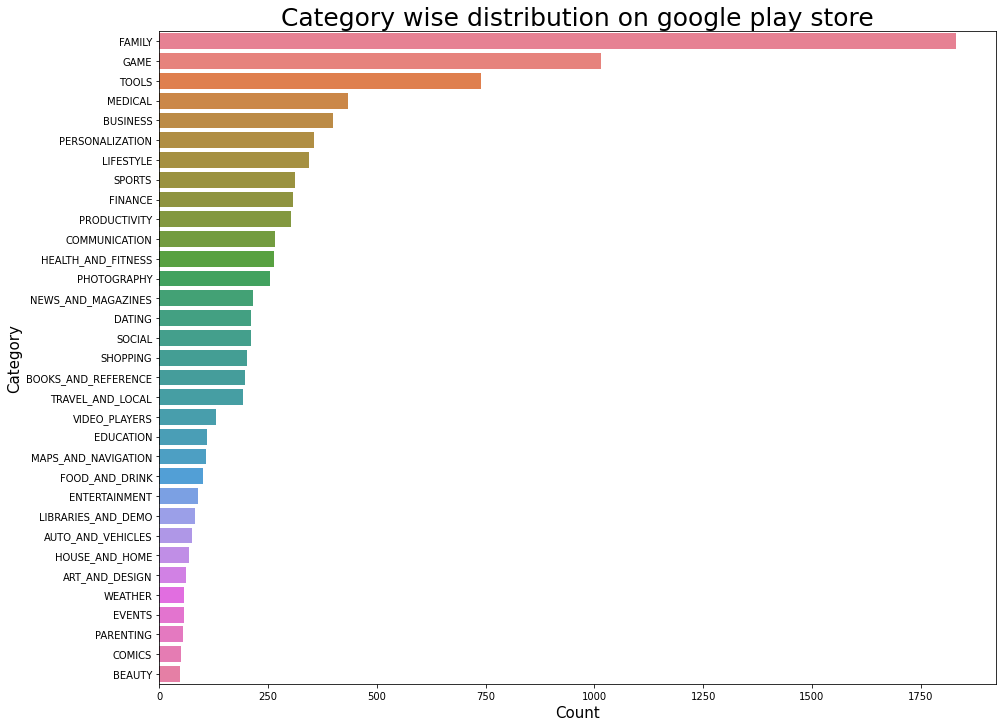

In [53]:
#Plotting The categroy wise count of apps for easy understanding of data.
plt.figure(figsize = (15,12))
plt.xlabel('Count', fontsize=15)
plt.ylabel('Category', fontsize=15)
graph = sns.barplot(x='Count', y ='Category' , data=category_wise_count, palette='husl')
graph.set_title("Category wise distribution on google play store", fontsize = 25);
plt.savefig('Category wise distribution on google play store.png')

In [54]:
#Checking the count of apps present in the play store belonging to various Content Rating.
content_rating_wise_distribution = play_store_data['Content Rating'].value_counts().reset_index().rename(columns={'index':'Content Rating', 'Content Rating':'No.Of Apps'})

In [55]:
content_rating_wise_distribution

,Content Rating,No.Of Apps
0,Everyone,7416
1,Teen,987
2,Mature 17+,406
3,Everyone 10+,332
4,Adults only 18+,2
5,Unrated,2


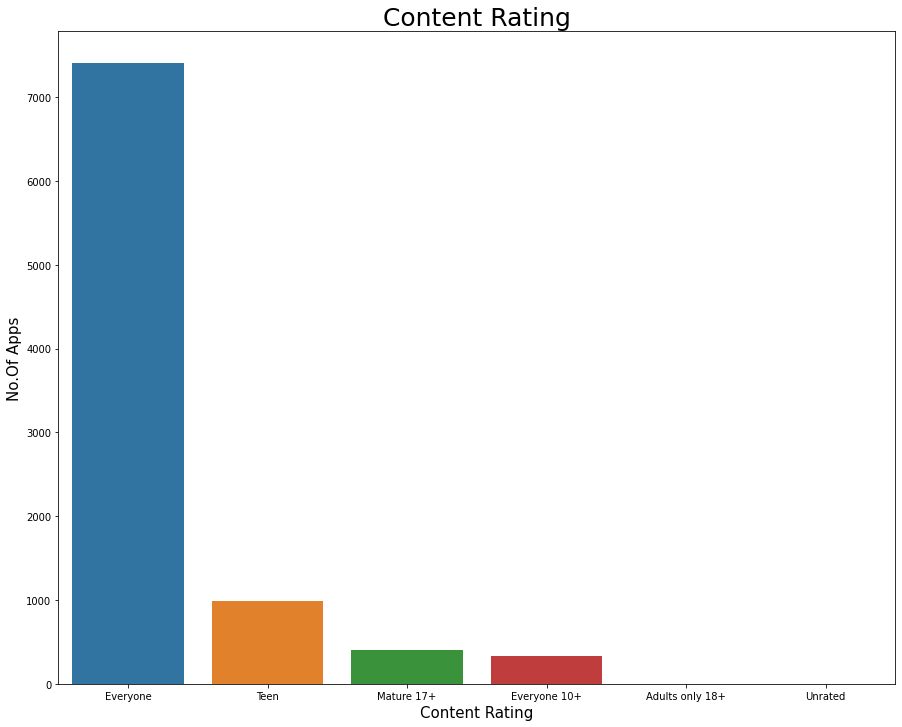

In [56]:
#Plotting the data of Content rating wise app count for better understanding of data.
plt.figure(figsize = (15,12))
plt.ylabel('No.Of Apps', fontsize=15)
plt.xlabel('Content Rating', fontsize=15)
plt.title('Content Rating', size=25)
sns.barplot(x='Content Rating', y='No.Of Apps', data=content_rating_wise_distribution);
plt.savefig('Content rating wise distribution on google play store.png')

In [57]:
#Checking the number of installs based ont the Category of apps.
category_wise_installs = play_store_data.groupby('Category')['Installs'].sum().reset_index().sort_values(by='Installs', ascending=False)

In [58]:
category_wise_installs

,Category,Installs
14,GAME,29874564253
11,FAMILY,6798793425
6,COMMUNICATION,4941943051
21,NEWS_AND_MAGAZINES,4252005650
29,TOOLS,3527094815
25,PRODUCTIVITY,2742312744
24,PHOTOGRAPHY,2557897655
26,SHOPPING,1504248785
28,SPORTS,1138949498
23,PERSONALIZATION,998179772


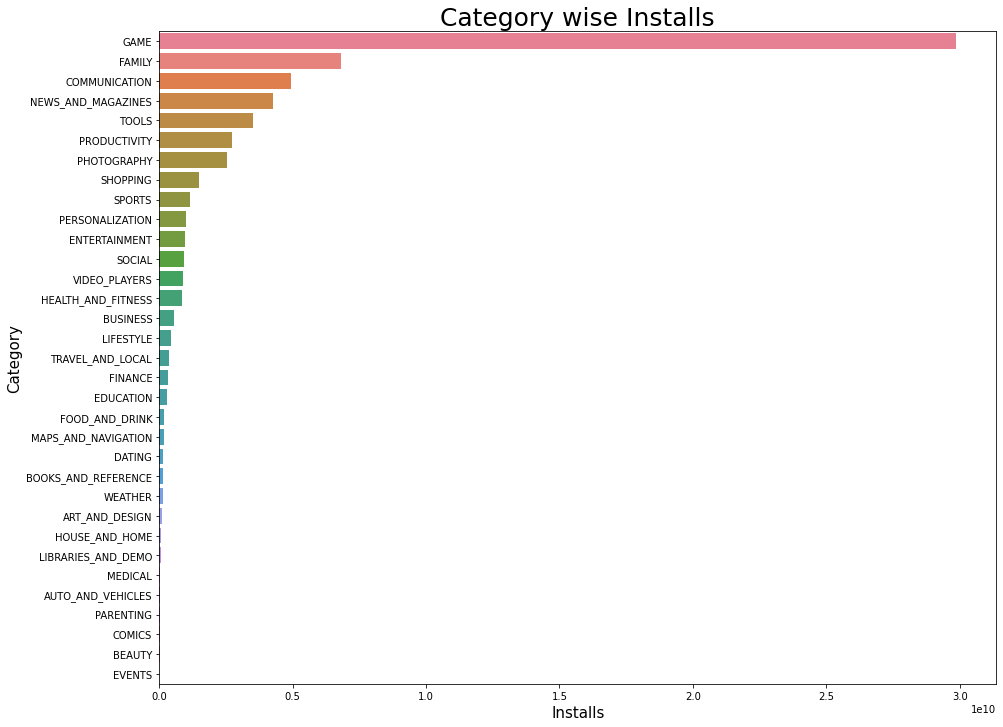

In [59]:
#Plotting the category wise Installs data for Better understanding.
plt.figure(figsize = (15,12))
plt.ylabel('Category', fontsize=15)
plt.xlabel('Installs', fontsize=15)
plt.title('Category wise Installs', size=25)
sns.barplot(x='Installs', y ='Category' , data=category_wise_installs, palette='husl');
plt.savefig('Category wise Installs on google play store.png')

In [60]:
#Checking the No.of installs for apps in the play store belonging to various Content Rating.
content_rating_wise_installs = play_store_data.groupby('Content Rating')['Installs'].sum().reset_index().sort_values(by='Installs', ascending=False)

In [61]:
content_rating_wise_installs

,Content Rating,Installs
1,Everyone,41245783278
4,Teen,12258368768
2,Everyone 10+,10187171740
3,Mature 17+,1372359178
0,Adults only 18+,1500000
5,Unrated,50500


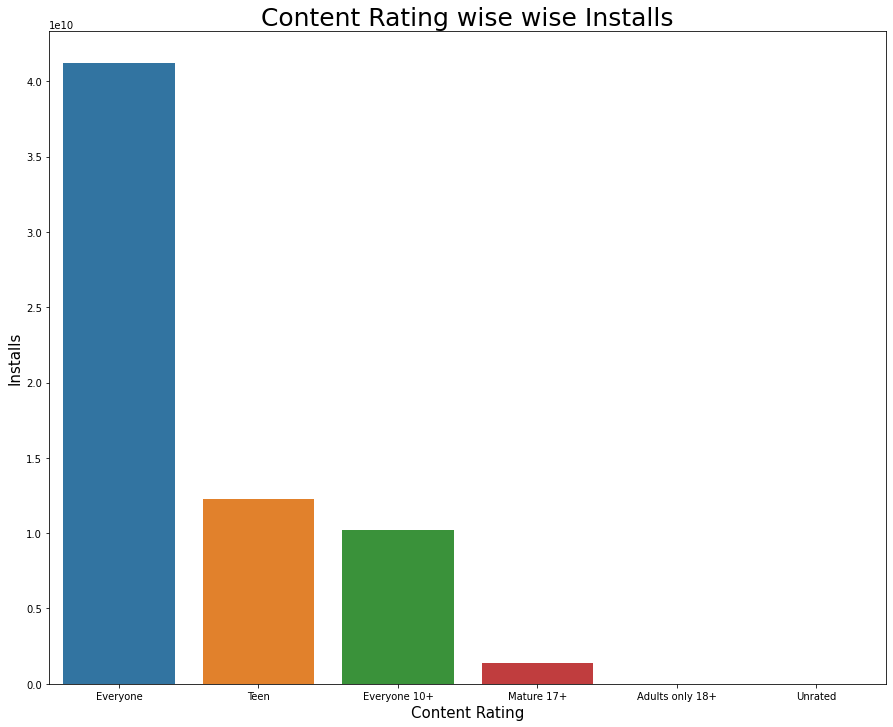

In [62]:
#Plotting the content rating wise installs for better understanding of data.
plt.figure(figsize = (15,12))
plt.xlabel('Content Rating', fontsize=15)
plt.ylabel('INstalls', fontsize=15)
plt.title('Content Rating wise wise Installs', size=25)
sns.barplot(x='Content Rating', y='Installs', data=content_rating_wise_installs);

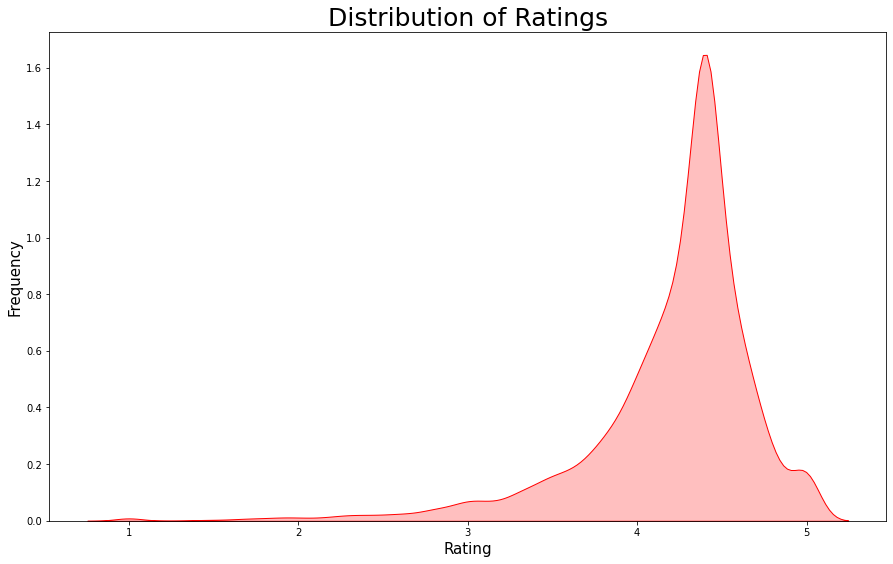

In [63]:
#Checking How Rating values are distributed by plotting a Distribution Curve.  
plt.figure(figsize=(15,9))
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
graph= sns.kdeplot(play_store_data.Rating, color='Red', shade=True)
plt.title('Distribution of Ratings', size = 25);

In [64]:
#Comparing the percentage of Free apps vs Paid apps on the play store.
type_wise_count = play_store_data.groupby('Type')['App'].count().reset_index().rename(columns={'App':'No.Of Apps'})

In [65]:
type_wise_count

,Type,No.Of Apps
0,Free,8421
1,Paid,724


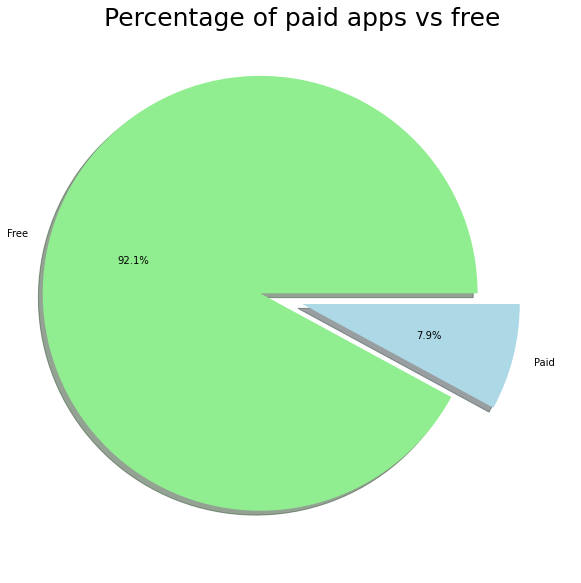

In [66]:
#Plotting the percentage of paid apps vs free apps on a pie chart for better understanding.
plt.figure(figsize=(10,10))
labels = type_wise_count['Type']
sizes = type_wise_count['No.Of Apps']
colors = ['LightGreen', 'LightBlue']
explode=(0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%' ,shadow=True)
plt.title('Percentage of paid apps vs free', size=25)
plt.show;

In [67]:
type_wise_installs = play_store_data.groupby('Type')['Installs'].sum().reset_index()

In [68]:
type_wise_installs

,Type,Installs
0,Free,65017532745
1,Paid,47700719


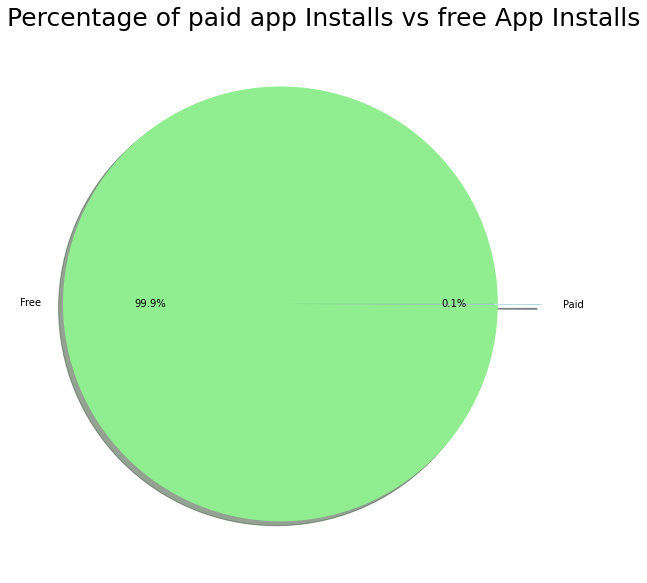

In [69]:
#Plotting the percentage of paid app installs vs free app installs on a pie chart for better understanding.
plt.figure(figsize=(10,10))
labels = type_wise_installs['Type']
sizes = type_wise_installs['Installs']
colors = ['LightGreen', 'LightBlue']
explode=(0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%' ,shadow=True)
plt.title('Percentage of paid app Installs vs free App Installs', size=25)
plt.show;

In [70]:
#Writing a function to find and plot top 10 apps in any category
def findtop10incategory(str):
  str = str.upper()
  category = play_store_data[play_store_data['Category']== str]
  top10apps = category.sort_values(by='Installs', ascending=False).head(10)
  plt.figure(figsize=(15,12))
  plt.title('Top 10 Installed apps', size=20);
  graph = sns.barplot(x=top10apps.App, y=top10apps.Installs)
  graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');


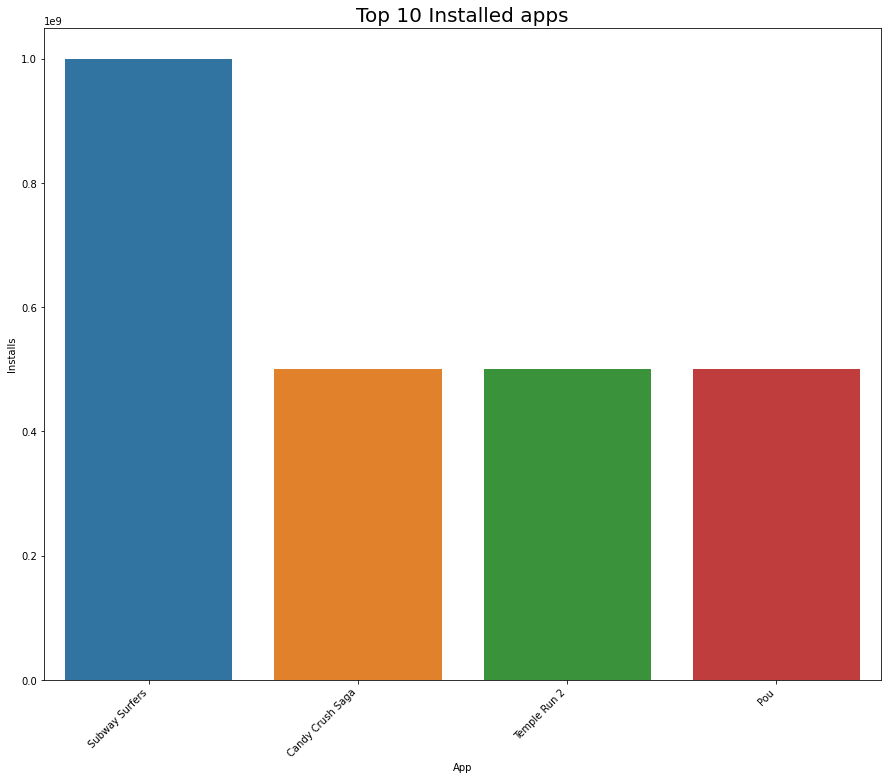

In [71]:
#Checking which are the top 10 apps in the 'Game' Category.
findtop10incategory('Game')
plt.savefig('Top 10 installed apps in Games category.png')

In [72]:
#Checking which are the 10 most expensive apps on the play store.
top10paidapps = play_store_data[play_store_data['Type']=='Paid'].sort_values(by='Price', ascending=False).head(10)

In [73]:
#Checking which apps have the highest reviews on the play store.
Apps_with_highest_reviews = play_store_data.sort_values(by='Reviews', ascending=False).head(50)

In [74]:
apps_with_highest_reviews_sorted = Apps_with_highest_reviews.groupby('App')['Reviews'].sum().reset_index().sort_values(by='Reviews', ascending=False)

In [75]:
apps_with_highest_reviews_sorted

,App,Reviews
4,Clash of Clans,179558781
12,Subway Surfers,166331958
2,Candy Crush Saga,156993136
0,8 Ball Pool,99386198
3,Clash Royale,92530298
13,UC Browser - Fast Download Private & Secure,53140694
10,Pou,41939801
8,My Talking Angela,29647104
1,Cache Cleaner-DU Speed Booster (booster & clea...,25519478
11,Shadow Fight 2,21960912


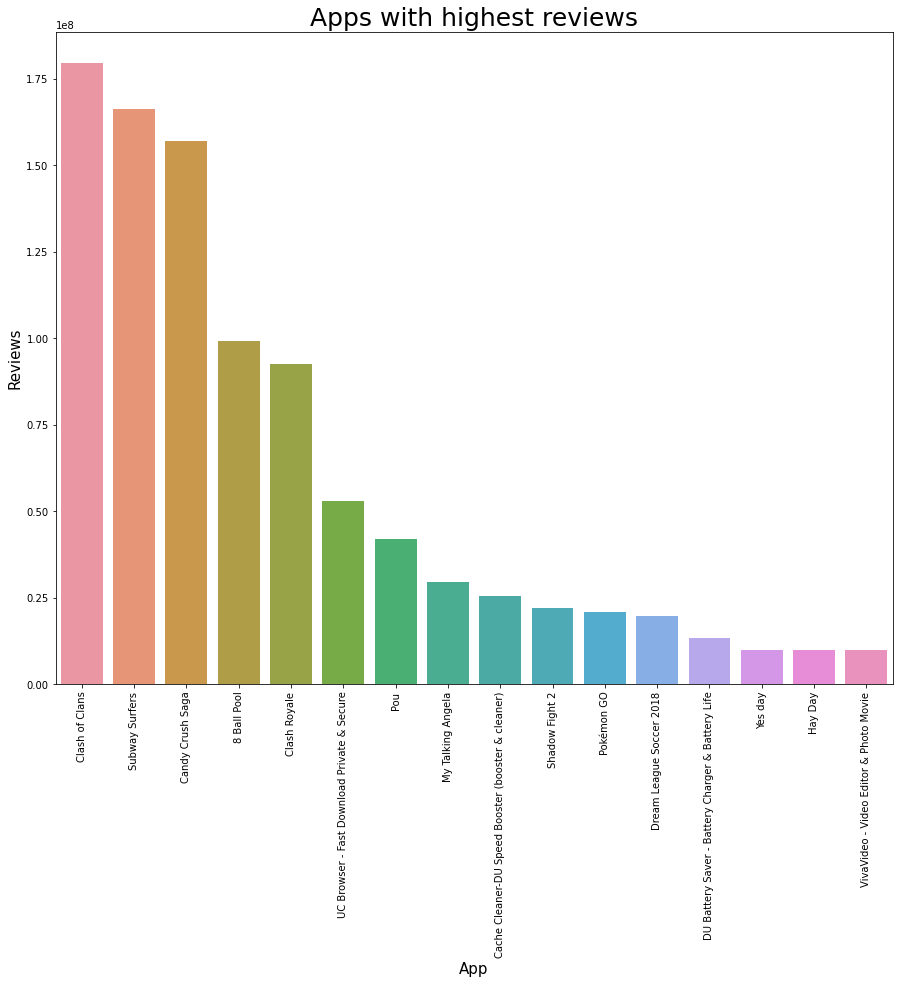

In [76]:
plt.figure(figsize = (15,12))
plt.xlabel('App', fontsize=15)
plt.ylabel('Reviews', fontsize=15)
plt.title('Apps with highest reviews', size=25)
plt.xticks(rotation=90)
sns.barplot(x='App', y='Reviews', data=apps_with_highest_reviews_sorted);
plt.savefig('Apps With the highest reviews')

In [77]:
#Checking which Genres have the highest number of apps on the play store.
top_genres = play_store_data['Genres'].value_counts().sort_values(ascending=False).head(50).reset_index().rename(columns={'index':'Genre', 'Genres':'Count'})

In [78]:
top_genres

,Genre,Count
0,Tools,739
1,Entertainment,537
2,Education,496
3,Medical,434
4,Business,400
5,Personalization,355
6,Lifestyle,344
7,Action,327
8,Sports,325
9,Finance,307


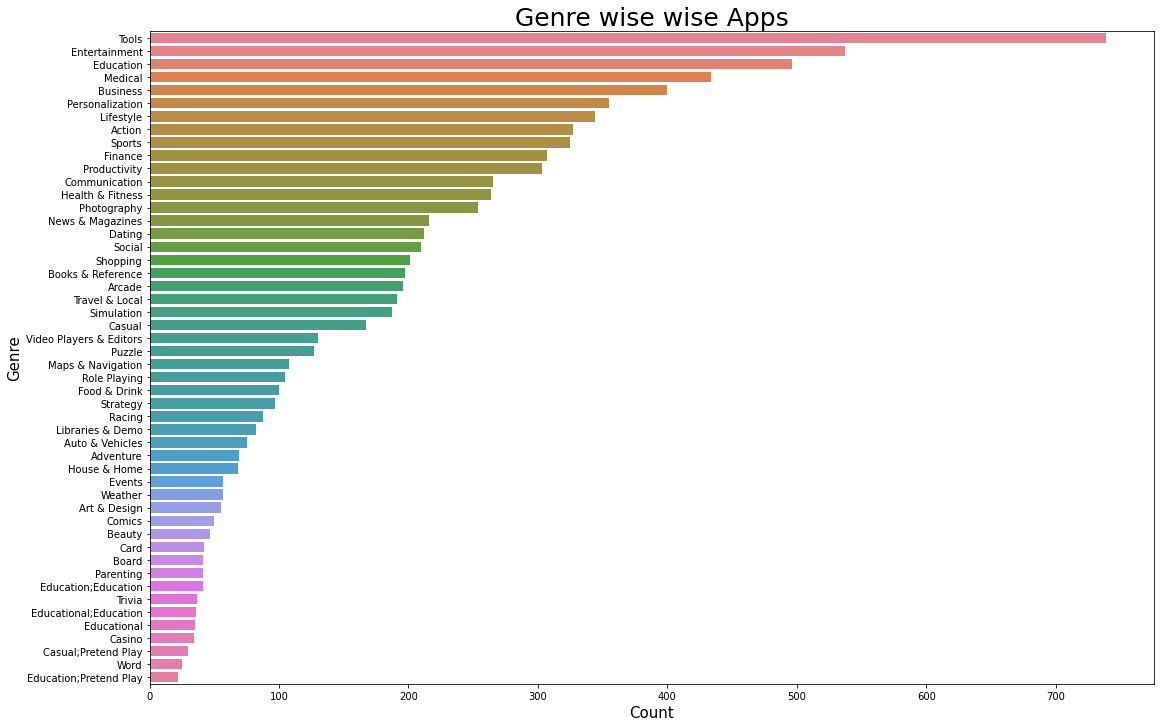

In [79]:
#Plotting No. Of apps by genre. 
plt.figure(figsize = (18,12))
plt.ylabel('Genres', fontsize=15)
plt.xlabel('No.Of Apps', fontsize=15)
plt.title('Genre wise wise Apps', size=25)
sns.barplot(x='Count', y ='Genre' , data=top_genres, palette='husl');